In [149]:
import cv2

In [150]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [151]:
img=cv2.imread('./test_images/Katrinakaif1.jpeg')

In [152]:
img.shape

(2048, 1363, 3)

In [153]:
print(img)

[[[ 47  54  63]
  [ 46  53  62]
  [ 48  53  62]
  ...
  [195 192 188]
  [195 192 188]
  [195 192 188]]

 [[ 45  52  61]
  [ 45  52  61]
  [ 47  52  61]
  ...
  [194 191 187]
  [194 191 187]
  [194 191 187]]

 [[ 47  52  61]
  [ 47  52  61]
  [ 48  53  62]
  ...
  [193 190 186]
  [193 190 186]
  [193 190 186]]

 ...

 [[101 117 140]
  [104 120 143]
  [ 77  93 116]
  ...
  [ 35  49  72]
  [ 39  53  76]
  [ 67  81 104]]

 [[121 137 160]
  [107 123 146]
  [ 58  74  97]
  ...
  [ 53  66  92]
  [ 45  58  84]
  [ 69  82 108]]

 [[ 94 110 133]
  [ 78  94 117]
  [ 45  61  84]
  ...
  [ 29  42  68]
  [ 11  24  50]
  [ 33  46  72]]]


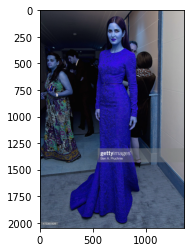

In [154]:
plt.imshow(img)

In [155]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [156]:
gray.shape

(2048, 1363)

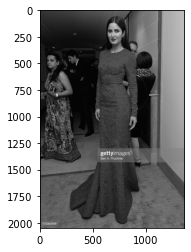

In [157]:
plt.imshow(gray,cmap='gray')

In [158]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[603, 131, 182, 182],
       [ 38, 429, 119, 119]], dtype=int32)

In [159]:
(x,y,w,h) = faces[0]
x,y,w,h

(603, 131, 182, 182)

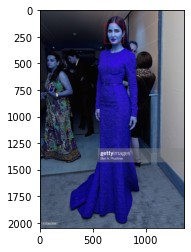

In [160]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

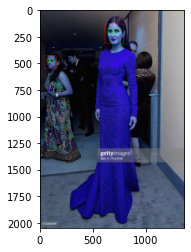

In [161]:

cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

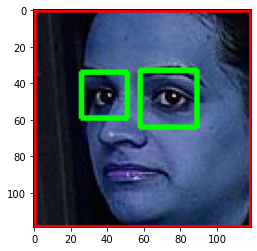

In [162]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

(119, 119, 3)

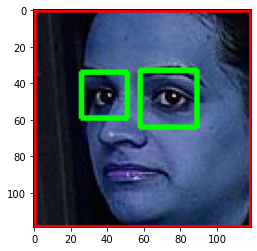

In [163]:
plt.imshow(roi_color, cmap='gray')
cropped_img = np.array(roi_color)  ##croping the facial region and converting into array.
cropped_img.shape

In [164]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

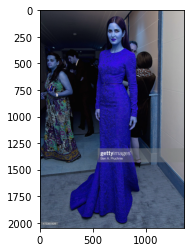

In [165]:
original_image = cv2.imread('./test_images/Katrinakaif1.jpeg')
plt.imshow(original_image)

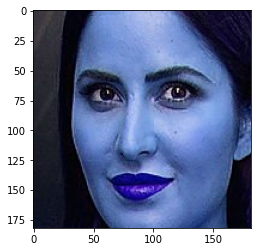

In [166]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/Katrinakaif1.jpeg')
plt.imshow(cropped_image)

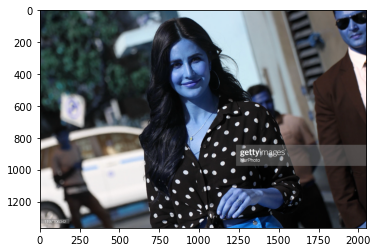

In [167]:
omg_img_obstructed = cv2.imread('./test_images/Katrinakaif2.jpeg')
plt.imshow(omg_img_obstructed)

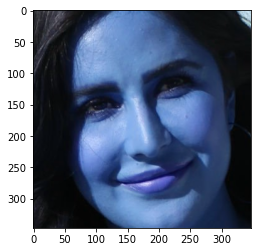

In [168]:
cropped_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/Katrinakaif2.jpeg')
plt.imshow(cropped_no_2_eyes)

In [169]:
path_to_data = "./dataset/"
path_to_cr_data="./dataset/cropped/"

In [170]:
import os
img_dirs = [ ]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
    

In [171]:
img_dirs

['./dataset/amir khan ',
 './dataset/priyanaka chopra ',
 './dataset/kartik aryan',
 './dataset/cropped',
 './dataset/katrina kaif ',
 './dataset/Aishwarya Rai']

In [172]:
## Creating a cropped folder
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [173]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        process = False
        html = False
        image_ext_list = ['jpeg', 'jpg', 'webp', 'png']
        process = entry.path.endswith(tuple(image_ext_list))
        if process == False:
            continue
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1  

amir khan 
Generating cropped images in folder:  ./dataset/cropped/amir khan 
priyanaka chopra 
Generating cropped images in folder:  ./dataset/cropped/priyanaka chopra 
kartik aryan
Generating cropped images in folder:  ./dataset/cropped/kartik aryan
cropped
katrina kaif 
Generating cropped images in folder:  ./dataset/cropped/katrina kaif 
Aishwarya Rai
Generating cropped images in folder:  ./dataset/cropped/Aishwarya Rai


In [ ]:
##Using wavelet transform as a feature for training our model
import numpy as np
import pywt
import cv2


In [174]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

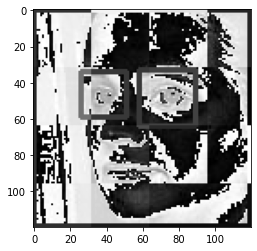

In [175]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [176]:
celebrity_file_names_dict

{'amir khan ': ['./dataset/cropped/amir khan /amir khan 1.png',
  './dataset/cropped/amir khan /amir khan 2.png',
  './dataset/cropped/amir khan /amir khan 3.png',
  './dataset/cropped/amir khan /amir khan 4.png',
  './dataset/cropped/amir khan /amir khan 5.png',
  './dataset/cropped/amir khan /amir khan 6.png',
  './dataset/cropped/amir khan /amir khan 7.png',
  './dataset/cropped/amir khan /amir khan 8.png',
  './dataset/cropped/amir khan /amir khan 9.png',
  './dataset/cropped/amir khan /amir khan 10.png',
  './dataset/cropped/amir khan /amir khan 11.png',
  './dataset/cropped/amir khan /amir khan 12.png',
  './dataset/cropped/amir khan /amir khan 13.png',
  './dataset/cropped/amir khan /amir khan 14.png',
  './dataset/cropped/amir khan /amir khan 15.png',
  './dataset/cropped/amir khan /amir khan 16.png',
  './dataset/cropped/amir khan /amir khan 17.png',
  './dataset/cropped/amir khan /amir khan 18.png',
  './dataset/cropped/amir khan /amir khan 19.png',
  './dataset/cropped/amir 

In [178]:
## getting the keys of actors in dictionary

class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] =count
    count=count+1
    
class_dict.pop('cropped')
class_dict


{'amir khan ': 0,
 'priyanaka chopra ': 1,
 'kartik aryan': 2,
 'katrina kaif ': 4,
 'Aishwarya Rai': 5}

In [179]:
##now we will be creating X and y data points

celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

cropped_image_dirs



['./dataset/cropped/amir khan ',
 './dataset/cropped/priyanaka chopra ',
 './dataset/cropped/kartik aryan',
 './dataset/cropped/katrina kaif ',
 './dataset/cropped/Aishwarya Rai']

In [180]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [181]:
len(X[0])

4096

In [182]:
32*32*3 + 32*32

4096

In [183]:
X[0]

array([[ 30],
       [ 29],
       [ 39],
       ...,
       [254],
       [  7],
       [ 57]], dtype=uint8)

In [184]:
y[0]

0

In [185]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(380, 4096)

In [186]:
## Cleaning is done now we are ready to load our model

## we are using support vector machines
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [191]:
## now we will be splitting our data
X_train,X_test ,y_train ,y_test = train_test_split(X,y,random_state=0)

In [192]:
## setting up pipeline
pipeline = Pipeline([('scaler',StandardScaler()) , ('svc',SVC(kernel='rbf',C=10))])

In [193]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [194]:
pipeline.score(X_test,y_test)

0.6736842105263158

In [195]:
print(classification_report(y_test,pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64        23
           1       0.71      0.83      0.77        18
           2       0.60      1.00      0.75        12
           4       0.73      0.58      0.65        19
           5       0.67      0.52      0.59        23

    accuracy                           0.67        95
   macro avg       0.68      0.71      0.68        95
weighted avg       0.68      0.67      0.67        95



In [198]:
##Lets use gridsearch cv to hypertune and find out which model gives us the best results

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [199]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [201]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.722807,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.522807,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.712281,{'logisticregression__C': 1}


In [202]:
best_estimators['svm'].score(X_test,y_test)

0.7157894736842105

In [203]:
best_estimators['random_forest'].score(X_test,y_test)

0.45263157894736844

In [204]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6736842105263158